# Fake_News_Detection_Project

# Problem statement:

    The authenticity of Information has become a longstanding issue affecting businesses and society, both for printed and digital media. On social networks, the reach and effects of information spread occur at such a fast pace and so amplified that distorted, inaccurate, or false information acquires a tremendous potential to cause real-world impacts, within minutes, for millions of users. Recently, several public concerns about this problem and some approaches to mitigate the problem were expressed. 


# Objective :
    
    In this project, you are given a dataset in the fake-news_data.zip folder. The folder contains aCSV files train_news.csv and you have to use the train_news.csv data to build a model to predict whether a news is fake or not fake. You have to try out different models on the dataset,evaluate their performance, and finally report thebest model you got on the data and its performance.

# Importing Libraries

In [1]:
##importing libraries

#data manipulation
import pandas as pd
import numpy as np
import re
import string

##Machine learning and text processing libraries
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from wordcloud import WordCloud


#libraries used for visualizations
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

# Importing the CSV file

In [2]:
#importing the csv file
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
dftrain=pd.read_csv(r"train_news")
dftrain.head(10)

,Unnamed: 0,id,headline,written_by,news,label
0,0,9653,Ethics Questions Dogged Agriculture Nominee as...,Eric Lipton and Steve Eder,"WASHINGTON — In Sonny Perdue’s telling, Geo...",0
1,1,10041,U.S. Must Dig Deep to Stop Argentina’s Lionel ...,David Waldstein,HOUSTON — Venezuela had a plan. It was a ta...,0
2,2,19113,Cotton to House: ’Do Not Walk the Plank and Vo...,Pam Key,"Sunday on ABC’s “This Week,” while discussing ...",0
3,3,6868,"Paul LePage, Besieged Maine Governor, Sends Co...",Jess Bidgood,"AUGUSTA, Me. — The beleaguered Republican g...",0
4,4,7596,A Digital 9/11 If Trump Wins,Finian Cunningham,Finian Cunningham has written extensively on...,1
5,5,3196,Whatever the Outcome on November 8th the US Wi...,NaN,Taming the corporate media beast Whatever the ...,1
6,6,5134,Rapid Evolution Saved This Fish From Pollution...,JoAnna Klein,The State of New Jersey says you can’t eat the...,0
7,7,1504,Alabama Prison Officials Retaliate Against Pri...,Brian Sonenstein,Advocates say prison officials at the Kilby Co...,1
8,8,13559,NaN,steventexas,People have made up their minds on president.\...,1
9,9,4203,Can We Live in a Constant State of Love?,Gillian,Leave a reply \nToni Emerson – When we fall in...,1


# Data- Description:
    
There are 6 columns in the dataset provided to you. The description of each of the column is given below:

1. “id”:  Unique id of each news article.


2. “headline”:  It is the title of the news.


3. “news”:  It contains the full text of the news article.


4. “Unnamed:0”:  It is a serial number.


5. “written_by”:  It represents the author of the news article.


6. “label”:  It tells whether the news is fake (1) or not fake (0).


# Exploratory Data Analysis :

In [3]:
#basic info
dftrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20800 entries, 0 to 20799
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  20800 non-null  int64 
 1   id          20800 non-null  int64 
 2   headline    20242 non-null  object
 3   written_by  18843 non-null  object
 4   news        20761 non-null  object
 5   label       20800 non-null  int64 
dtypes: int64(3), object(3)
memory usage: 975.1+ KB


In [4]:
#shape of the data-set
dftrain.shape

(20800, 6)

In [5]:
#Basic statistical Data
dftrain.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,20800.0,10399.500000,6004.587135,0.0,5199.75,10399.5,15599.25,20799.0
id,20800.0,10399.500000,6004.587135,0.0,5199.75,10399.5,15599.25,20799.0
label,20800.0,0.500625,0.500012,0.0,0.00,1.0,1.00,1.0


In [6]:
dftrain.describe(include='object').T

,count,unique,top,freq
headline,20242,19803,Get Ready For Civil Unrest: Survey Finds That ...,5
written_by,18843,4201,Pam Key,243
news,20761,20386,,75


In [7]:
#values and count of the target variable
dftrain.label.value_counts()

1    10413
0    10387
Name: label, dtype: int64

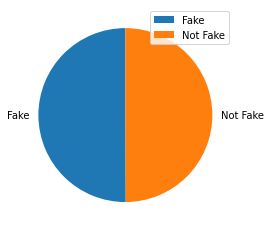

In [8]:
# checking the data distribution among the data-set
y=dftrain.label.value_counts()
mylabels = ["Fake", "Not Fake"]
plt.pie(y, labels = mylabels, startangle = 90)
plt.legend()
plt.show() 

# Observations :

1. The Dataset contains 6 columns, namely "Unnamed: 0", "id", "headline", "written_by", "news", "label". The shape of the data set is 20800 x 6.


2. It appears that the "Label" column is our Target Variable. Where as "news" is our main text resource. we will use this to build a ML model.    


3. The target value seems to be equally distributed.

# Handling Null Values :

Now we will check the null values in our data set.

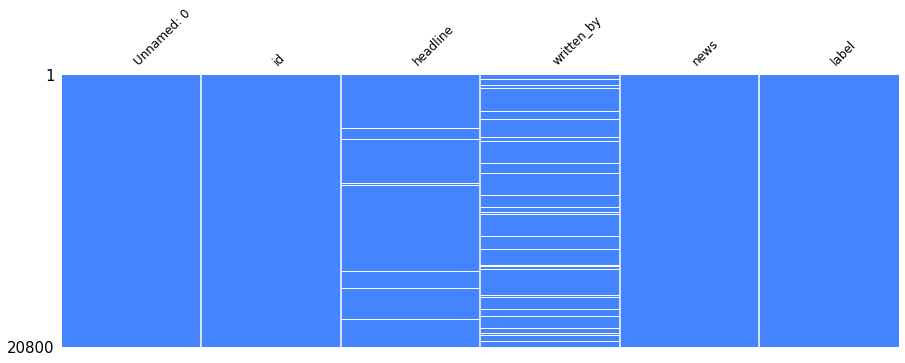

In [9]:
# Program to visualize missing values in dataset
# Importing the libraries
import missingno as msno
# Visualize missing values as a matrix
msno.matrix(dftrain,labels=True, sparkline=False, figsize=(15,5), fontsize=12, color=(0.27, 0.52, 1.0))

In [10]:
#checking the null values 
for col in dftrain.columns:
    print("\nTitle :",col,"\nNaN val:",dftrain[col].isnull().sum())


Title : Unnamed: 0 
NaN val: 0

Title : id 
NaN val: 0

Title : headline 
NaN val: 558

Title : written_by 
NaN val: 1957

Title : news 
NaN val: 39

Title : label 
NaN val: 0


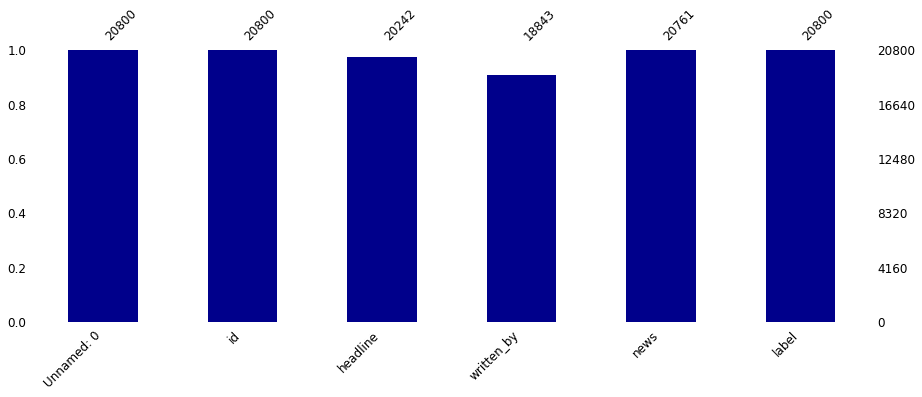

In [11]:
# Visualize missing values as a matrix
msno.bar(df = dftrain, figsize=(15, 5), fontsize=12, color="darkblue")

# Observation :


1. The above plot and data shows that, there is some data missing from the news coloumn in the given data-set.

2. we will now drop the Null values in our data-set.


In [12]:
# dropping the null-values 
dftrain.dropna(inplace= True)
print(dftrain.shape)
print(dftrain.isnull().sum())

(18285, 6)
Unnamed: 0    0
id            0
headline      0
written_by    0
news          0
label         0
dtype: int64


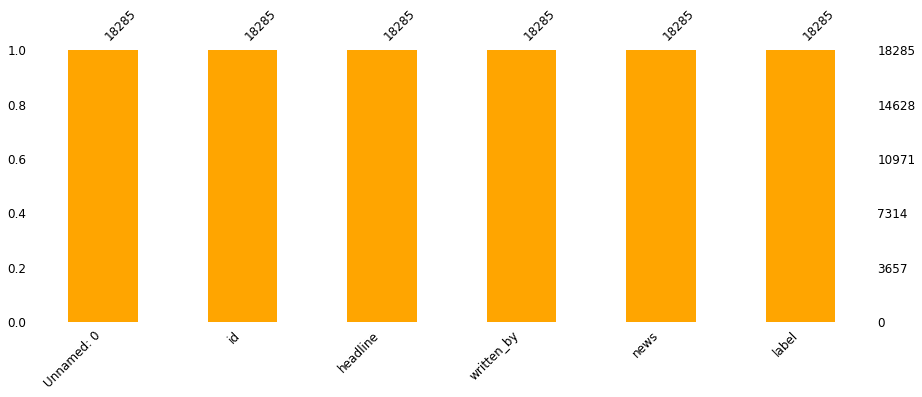

In [13]:
#visualizing the change
msno.bar(df = dftrain, figsize=(15,5), fontsize=12, color="orange")

# Observations :


1. we can see that the present data-set contains no null values, and it is equally distributed. 

# Dropping the less important columns :

We can see that the columns

1. "headline",

2. "written_by",

3. "id",

4. "Unnamed: 0" 

are not providing any important insights as of now. so dropping them would be a wise choice for now.


 The above mentioned columns have been dropped. 

In [14]:
dftrain = dftrain.drop(["headline", "written_by", "id","Unnamed: 0"], axis=1)
dftrain.head(5)

,news,label
0,"WASHINGTON — In Sonny Perdue’s telling, Geo...",0
1,HOUSTON — Venezuela had a plan. It was a ta...,0
2,"Sunday on ABC’s “This Week,” while discussing ...",0
3,"AUGUSTA, Me. — The beleaguered Republican g...",0
4,Finian Cunningham has written extensively on...,1


Further, we can move on to the text preprocessing.

# Text Data Pre-Processing :

Here, we will 

1. Transform the text into lower case.


2. Replace the email addresses with the text 'emailaddress'.


3. Replace the URLs with the text 'webaddress'.


4. Remove the HTML tags.


5. Remove the numbers.


6. Remove extra newlines.


7. Remove the punctuations.


8. Remove the unwanted white spaces.


9. Remove the stop words. 

In [15]:
# cleaning the text data for vectorization
# defining the function
def clean_txt(text):
    text = text.lower() #Converting the text to lower case
    text = re.sub('\[.*?\]','',text) #Replacing email addresses
    text = re.sub('\\W', ' ', text) #Removing Punctuations
    text = re.sub('https?://\S+|www\.S+', '', text)  #Replace URLs with 'webaddress'
    text = re.sub('<.*?>+', '', text) #Removing the HTML tags
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)#Removing Punctuations
    text = re.sub('\n', '', text) #Removing new lines
    text = re.sub('\w*\d\w*', '', text)
    tokenized_text = word_tokenize(text) #word_tokenization
    stop_words = set(stopwords.words('english') + ['u','ur','im','doin', 'ü', 'â', 'e', 'ur', 'doin', 'ure','READ MORE']) #declaring stop Stop_Words
    WL = WordNetLemmatizer() #declaring lemmatizer
    text = [WL.lemmatize(word) for word in tokenized_text if word not in stop_words if word.isalpha()] # lemmatization and removal of stop_words
    return " " .join(text)

In [16]:
# applying the clean_txt function to the "news" column
dftrain['news'] = dftrain['news'].apply(clean_txt)
dftrain.head(5)

,news,label
0,washington sonny perdue telling georgian growi...,0
1,houston venezuela plan tactical approach desig...,0
2,sunday abc week discussing republican plan rep...,0
3,augusta beleaguered republican governor maine ...,0
4,finian cunningham written extensively internat...,1


# Observations:


1. All the functions has been applied and we got a cleaned text output. This text is further vectorized to build a Machine Learning model.

# Word Cloud :

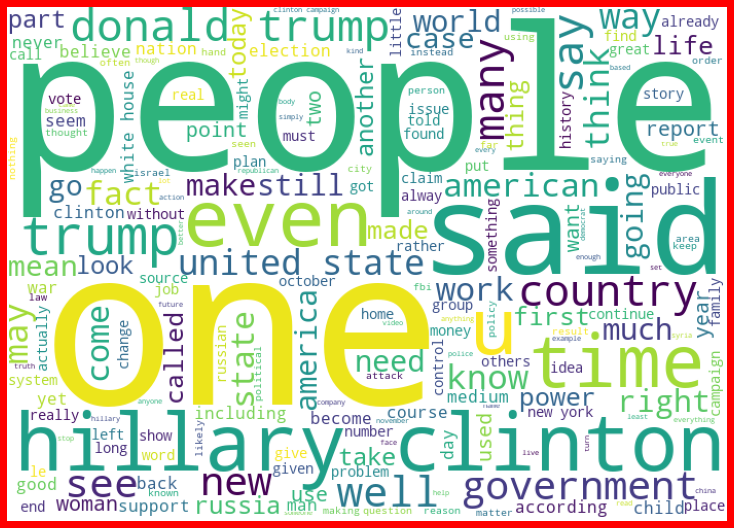

In [17]:
#Getting sense of words Fake news
plot = dftrain['news'][dftrain['label']==1]
plot_cloud = WordCloud(width=700,height=500,background_color='white',max_words=200).generate(' '.join(plot))
plt.figure(figsize=(10,8),facecolor='r')
plt.imshow(plot_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

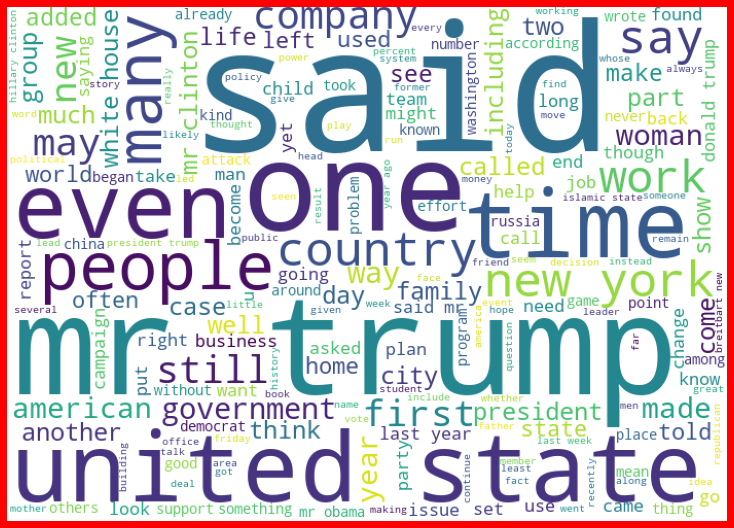

In [18]:
#Getting sense of words Not_Fake news
plot = dftrain['news'][dftrain['label']==0]
plot_cloud = WordCloud(width=700,height=500,background_color='white',max_words=200).generate(' '.join(plot))
plt.figure(figsize=(10,8),facecolor='r')
plt.imshow(plot_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

# Text Data vectorization :

In [19]:
# vectorizing the text data using TfidfVectorizer 
tfidf = TfidfVectorizer(max_features = 15000)
x = tfidf.fit_transform(dftrain['news'])
y = dftrain['label']

# Builiding the Machine Learning Model :

# Creating train_test_split 

In [20]:
#Creating train_test_split 
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=.25,stratify=y)

In [21]:
# find the shape of x and y
x.shape, y.shape

((18285, 15000), (18285,))

In [22]:
# find the shape of x_train and y_train
x_train.shape, y_train.shape

((13713, 15000), (13713,))

# ML Model 

For this Classification ML Model we will use the following libraries:
    
    1. LogisticRegression
    
    2. DecisionTreeClassifier
    
    3. MultinomialNB
    
    4. RandomForestClassifier
    
    5. GradientBoostingClassifier

In [23]:
# importing machine learning models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

#Importing error metrics
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,roc_curve,auc
from sklearn.model_selection import GridSearchCV,cross_val_score

In [24]:
# Intializing the model
RF = RandomForestClassifier()
LR = LogisticRegression()
DT = DecisionTreeClassifier()
GBC = GradientBoostingClassifier()
MNB = MultinomialNB()

# appending models with their respective declarations
models= []
models.append(('RandomForestClassifier', RF))
models.append(('LogisticRegression',LR))
models.append(('GradientBoostingClassifier',GBC))
models.append(('DecisionTreeClassifier',DT))
models.append(('MultinomialNB', MNB))

# Creating empty list
Model=[]
score=[]
cvs=[]
roc_auc_score=[]
Precision=[]

# creating a loop to run the data through the models
for name,model in models:

    # model fitting
    Model.append(name)
    model.fit(x_train,y_train)
    print(model)
    pre=model.predict(x_test)
    print('\n')
    # accuracy score
    aucc_score=accuracy_score(y_test,pre)
    print('accuracy_score: ',aucc_score)
    score.append(aucc_score*100)
    print('\n')
    # cross-validation score
    cv_score=cross_val_score(model,x,y,cv=10,scoring='roc_auc').mean()
    print('Cross Val Score : ', cv_score)
    cvs.append(cv_score*100)
    print('\n')
    # classification report
    print('classification_report\n',classification_report(y_test,pre))
    # roc_auc
    false_positive_rate,true_positive_rate, thresholds=roc_curve(y_test,pre)
    roc_auc=auc(false_positive_rate, true_positive_rate)
    print('roc auc score : ', roc_auc)
    roc_auc_score.append(roc_auc*100)
    print('\n')
    # confusion matrix
    print('Confusion Matrix:\n',confusion_matrix(y_test,pre))
    print('\n')
    print("..........................................................")
    print('\n') 

RandomForestClassifier()


accuracy_score:  0.9330708661417323


Cross Val Score :  0.9879757910872303


classification_report
               precision    recall  f1-score   support

           0       0.91      0.97      0.94      2591
           1       0.96      0.88      0.92      1981

    accuracy                           0.93      4572
   macro avg       0.94      0.93      0.93      4572
weighted avg       0.93      0.93      0.93      4572

roc auc score :  0.9269852483190854


Confusion Matrix:
 [[2520   71]
 [ 235 1746]]


..........................................................


LogisticRegression()


accuracy_score:  0.9426946631671042


Cross Val Score :  0.9890544210427284


classification_report
               precision    recall  f1-score   support

           0       0.95      0.95      0.95      2591
           1       0.93      0.93      0.93      1981

    accuracy                           0.94      4572
   macro avg       0.94      0.94      0.94      4572
we

# Final Results

In [25]:
scores=pd.DataFrame({'Model': Model,'Accuracy Score': score,'Cross Val Score':cvs,'Roc_Auc_curve':roc_auc_score})

In [26]:
scores

,Model,Accuracy Score,Cross Val Score,Roc_Auc_curve
0,RandomForestClassifier,93.307087,98.797579,92.698525
1,LogisticRegression,94.269466,98.905442,94.153723
2,GradientBoostingClassifier,91.929134,98.138082,91.898733
3,DecisionTreeClassifier,88.079615,88.270743,87.914082
4,MultinomialNB,89.370079,97.385740,88.315804


# Observation :

    1. we could visibly see that the "LogisticRegression" is performing well and good, when compared to all other ML Models.
    Thus we will consider "LogisticRegression" as our final ML Model. 
    
    
    2. we will now use "GridSearchCV" to hypertune the model for better efficiency.

# Hypertunning the best model using GridSearchCV :

In [27]:
# finding the best parameters for GridSearchCV
from sklearn.model_selection import GridSearchCV
def grid_cv(mod,parameters,scoring):
    clf = GridSearchCV(mod,parameters,scoring, cv=10)
    clf.fit(x,y)
    print(clf.best_params_)
# GridSearchCV    
lr=LogisticRegression()
parameters={'penalty': ['l1', 'l2'],'C':[0.001,.009,0.01,.09,1,5,10,25]}
grid_cv(lr,parameters,'accuracy')

{'C': 25, 'penalty': 'l2'}


In [28]:
# Using the GridSearchCV
clf_lr = LogisticRegression(C=25,penalty='l2')
clf_lr.fit(x_train,y_train)
LR_pred = clf_lr.predict(x_test)
print("Accuracy score: ",accuracy_score(y_test,LR_pred)*100)
print('Cross validation score: ',cross_val_score(clf_lr,x,y,cv=3,scoring='accuracy').mean()*100)
print('Classification report: \n')
print(classification_report(y_test,LR_pred))
print('Confusion matrix: \n')
print(confusion_matrix(y_test,LR_pred))

Accuracy score:  95.42869641294838
Cross validation score:  95.58654634946677
Classification report: 

              precision    recall  f1-score   support

           0       0.96      0.96      0.96      2591
           1       0.94      0.95      0.95      1981

    accuracy                           0.95      4572
   macro avg       0.95      0.95      0.95      4572
weighted avg       0.95      0.95      0.95      4572

Confusion matrix: 

[[2479  112]
 [  97 1884]]


AUC_ROC curve:



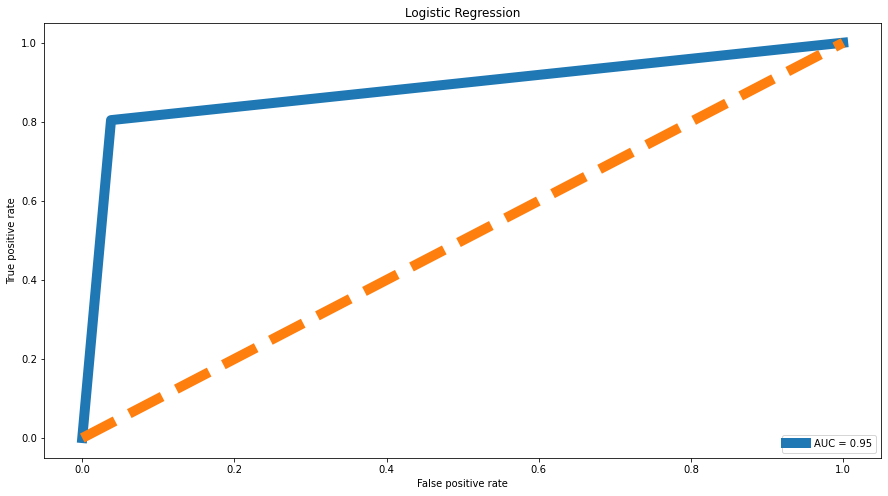

In [29]:
#Plotting AUC_ROC curve
fpr,tpr,thresholds=roc_curve(LR_pred,y_test)
roc_auc=auc(fpr,tpr)
plt.figure(figsize=(15,8))
print('AUC_ROC curve:\n')
plt.title("Logistic Regression")
plt.plot(false_positive_rate,true_positive_rate, lw=10, label='AUC = %0.2f'% roc_auc)
plt.plot([0,1],[0,1],lw=10,linestyle='--')
plt.legend(loc='lower right')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.show()

# Observations:

    1. With this improved Accuracy and precision we will finalize "LogisticRegression" as our final model. 
    
    2. Now following this we will try to predict then news as fake or not using the ML model. 
    
    3. The Auc_Roc curve shows the model is performing well.
    
    4. AUC = 0.96

# Predictions using the built ML model :

In [30]:
prediction = pd.DataFrame(data = y_test,)
prediction['Predicted values'] = LR_pred
prediction.to_csv('Fake_news_Predict.csv')
prediction.tail(10)

,label,Predicted values
555,0,0
12760,1,1
17547,0,0
8506,0,0
7126,0,0
1280,1,1
15383,0,0
20284,0,0
8210,1,1
16114,1,1


# Saving the job file :

In [31]:
# Creating Pickle File
import joblib
joblib.dump(clf_lr,'Fake_news_Prediction.pkl')

['Fake_news_Prediction.pkl']

# Manually Testing the Model :

In [41]:
def output_label(n):
    if n == 1:
        return "Fake News"
    else:
        return "Not a Fake News"

In [42]:
def manual_testing(news):
    testing_news = {"text" : [news]}
    new_def_test = pd.DataFrame(testing_news)
    new_def_test["text"] = new_def_test["text"].apply(clean_txt)
    new_x_test = new_def_test["text"]
    new_xv_test = tfidf.transform(new_x_test)
    pred_LR = clf_lr.predict(new_xv_test)
    return print("\n Logistic_Regression_prediction : {}".format(output_label(pred_LR)))

In [43]:
news = str(input())
manual_testing(news)

A few weeks after the election of Donald J. Trump, pundits with their eyes glued to Twitter believed theyâ€™d finally deciphered the master plan behind the  â€™s tweeting. Every time he detonated a   bomb on Twitter, they suspected, it was a sly bid to divert the public eye from more serious news about his impending administration. So when Mr. Trump reignited the dormant debate over flag burning one morning  â€”   tweeting that those who set fire to the flag should suffer â€œloss of citizenship or year in jail!â€  â€”   New York magazineâ€™s Jonathan Chait quickly produced a column decoding the message. He called it a â€œstrange fightâ€ and a â€œclassic   nationalist distractionâ€ that proves Mr. Trumpâ€™s â€œdangerous and authoritarian politics is calculated, and not merely crazy. â€ But soon a competing theory emerged: Minutes before Mr. Trumpâ€™s tweet, â€œFox  Friends,â€ one of the  â€™s favorite shows, ran a segment referencing an American flag burned on a college campus to p

In [44]:
news = str(input())
manual_testing(news)

"Home / Foreign Affairs / The Fix is In â€” Russia Kicked Off UN Human Rights Council, While Terrorist Saudi Arabia Re-Elected The Fix is In â€” Russia Kicked Off UN Human Rights Council, While Terrorist Saudi Arabia Re-Elected Jay Syrmopoulos October 29, 2016 1 Comment  New York, NY â€“ Russia lost an election to the UN Human Rights Council (UNHRC) for the first time since the councilâ€™s inception in 2006 â€“ narrowly being beaten out by Croatia â€“ as arguably the biggest supporter of terrorism in the world, Saudi Arabia, was re-elected to the council in spite of strong condemnation from global human rights organizations.  The 47 council seats are elected for a three-year term and regionally distributed, with staggered elections for one third of the seats every year. Russia had just completed a three-year term running against both Hungary and Croatia for the two available seats from Eastern Europe.  After the U.S. lobbied heavily against the Russians, Hungary finished substantially 

# CONCLUSION :

1. The "Logistic_Regression" works well with the given data_set.

2. The Mannual testing gives a very positive result.

# Limitations :

1. Lack of more information leads to minimized usage of the ML moidels potential.

2. More feature engineering is need for the data-set. 

3. With the help of more supporting informations the model can be used efficiently for all news sectors.



# End